In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from wordcloud import WordCloud
import os

# Configurações adicionais (se necessário)
sns.set(style="whitegrid")
%matplotlib inline

# Leitura e Modelagem do CSV

In [28]:
csv_filename = "output/nytimes.csv"

if not os.path.exists(csv_filename):
    print(f"Arquivo '{csv_filename}' não encontrado.")

try:
    df = pd.read_csv(csv_filename)
    print(f"Arquivo '{csv_filename}' carregado com sucesso!")
except Exception as e:
    print(f"Erro ao ler o arquivo CSV: {e}")

colunas_necessarias = ['data_hora', 'total', 'comentarios', 'likes', 'compartilhamentos',
                        'repostagens', 'tokens', 'texto_original', 'author_displayName', 'author_handle']
for col in colunas_necessarias:
    if col not in df.columns:
        print(f"A coluna '{col}' não foi encontrada no CSV. Verifique o arquivo.")

print(f"Total de posts encontrados: {len(df)}")

Arquivo 'output/nytimes.csv' carregado com sucesso!
Total de posts encontrados: 9997


# Evolução temporal de engajamento

### Evolução Temporal de Engajamento


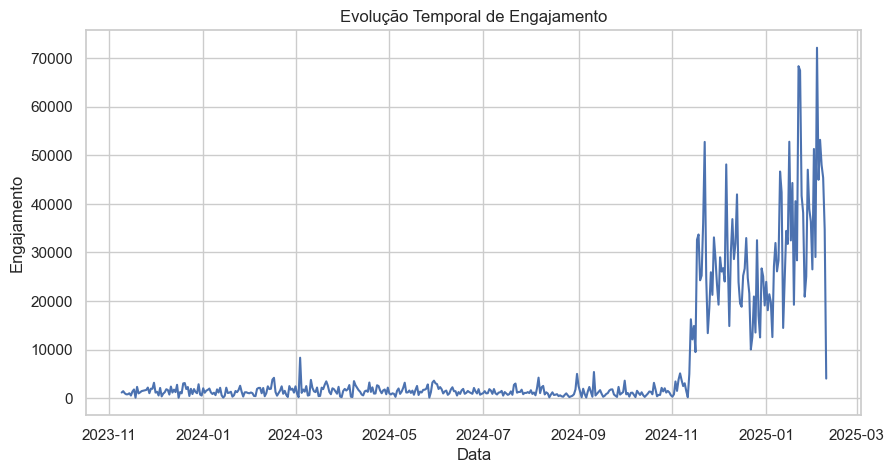

In [29]:
print("### Evolução Temporal de Engajamento")
df['data_hora'] = pd.to_datetime(df['data_hora'])
temporal_data = df.groupby(df['data_hora'].dt.date)['total'].sum()
temporal_data.plot(title="Evolução Temporal de Engajamento", figsize=(10,5))
plt.xlabel("Data")
plt.ylabel("Engajamento")
plt.show()

# Wordcloud

In [30]:
def generate_wordcloud(tokens_list):
    """
    Gera e exibe uma WordCloud a partir de uma lista de listas de tokens.
    """
    # Junta todos os tokens em uma string única
    all_tokens = ' '.join([' '.join(tokens) for tokens in tokens_list])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_tokens)
    
    # Exibe o WordCloud
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title("WordCloud das Palavras Mais Frequentes", fontsize=16)
    plt.show()

# Distribuição dos Valores


### Distribuição dos Valores


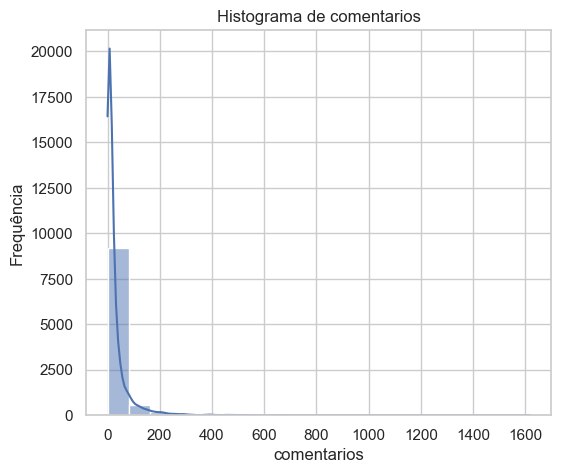

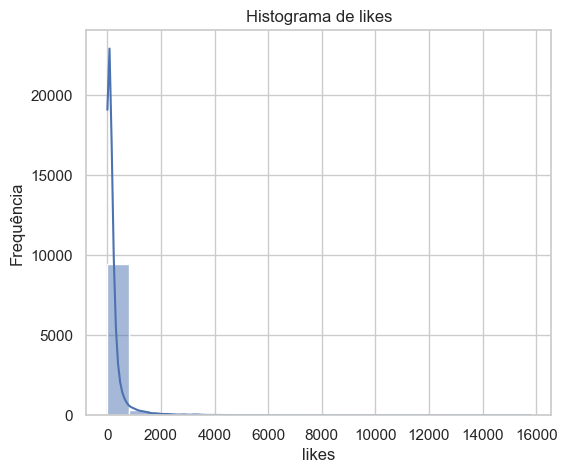

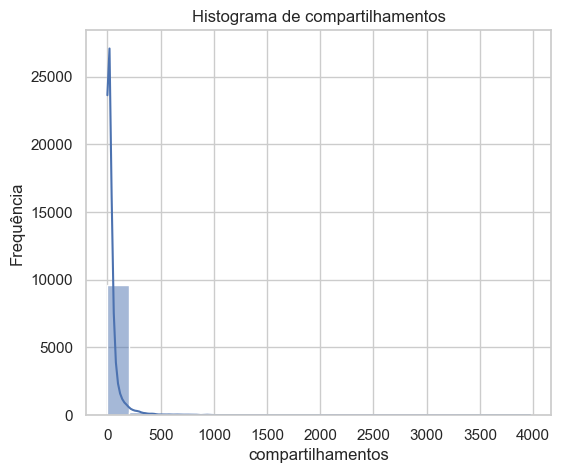

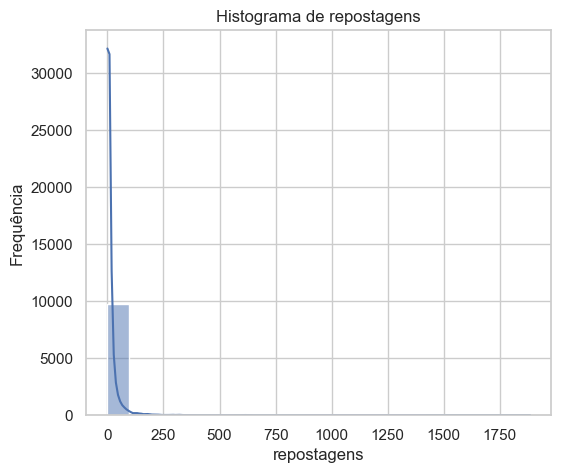

In [31]:
def distribution_values(df):
    """
    Exibe histogramas com distribuição dos valores das colunas numéricas.
    """
    numeric_columns = ['comentarios', 'likes', 'compartilhamentos', 'repostagens']
    
    for column in numeric_columns:
        fig, ax = plt.subplots(figsize=(6, 5))
        sns.histplot(df[column], bins=20, kde=True, ax=ax)
        ax.set_title(f'Histograma de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequência')
        plt.show()


# Distribuição dos valores (comentários, likes, compartilhamentos, repostagens)
print("### Distribuição dos Valores")
distribution_values(df)


# Correlação Entre os Atributos

### Correlação Entre os Atributos
### Matriz de Correlação
                   comentarios     likes  compartilhamentos  repostagens  \
comentarios           1.000000  0.457186           0.496032     0.766172   
likes                 0.457186  1.000000           0.865249     0.398356   
compartilhamentos     0.496032  0.865249           1.000000     0.489345   
repostagens           0.766172  0.398356           0.489345     1.000000   
total                 0.568536  0.986474           0.912329     0.515576   

                      total  
comentarios        0.568536  
likes              0.986474  
compartilhamentos  0.912329  
repostagens        0.515576  
total              1.000000  


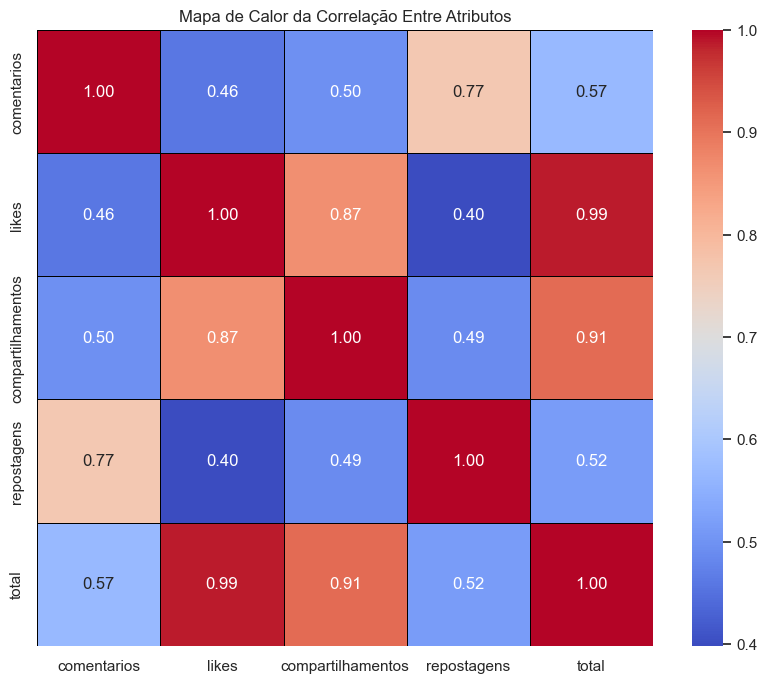

In [32]:
def analyze_correlation(df):
    """
    Calcula e exibe a matriz de correlação e o mapa de calor dos atributos numéricos.
    """
    numeric_columns = ['comentarios', 'likes', 'compartilhamentos', 'repostagens', 'total']
    matriz_correlacao = df[numeric_columns].corr()

    print("### Matriz de Correlação")
    print(matriz_correlacao)

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
                linewidths=0.5, linecolor='black', ax=ax)
    ax.set_title('Mapa de Calor da Correlação Entre Atributos')
    plt.show()

# Análise de correlação entre os atributos
print("### Correlação Entre os Atributos")
analyze_correlation(df)

## Identificar tokens mais repetidos

In [33]:
def get_top_tokens(df, top_n=10):
    """
    Retorna um DataFrame com os tokens que mais contribuíram para o engajamento.
    """
    token_engagement = {}
    # Para cada post, acumula o total de engajamento para cada token encontrado
    for _, row in df.iterrows():
        # Aqui assumimos que a coluna 'tokens' é armazenada no CSV como uma string que representa uma lista;
        # se for o caso, você pode converter usando eval() ou ast.literal_eval()
        tokens = row['tokens']
        # Se os tokens estiverem armazenados como string no formato "['token1', 'token2']",
        # utilize:
        if isinstance(tokens, str):
            try:
                import ast
                tokens = ast.literal_eval(tokens)
            except Exception as e:
                print(f"Erro ao converter tokens: {e}")
                tokens = []
        for token in tokens:
            token_engagement[token] = token_engagement.get(token, 0) + row['total']
    return pd.DataFrame(list(token_engagement.items()), columns=['Token', 'Engajamento']) \
             .sort_values(by='Engajamento', ascending=False).head(top_n)

## Previsão com ARIMA

## Previsão de Engajamento com ARIMA
### Série Temporal Diária de Engajamento


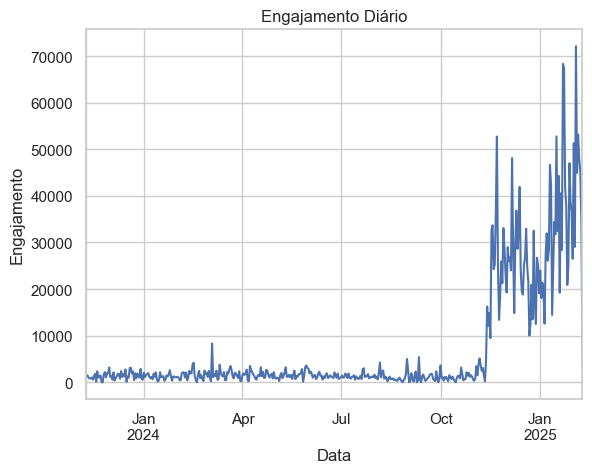

### Previsão para os Próximos Dias


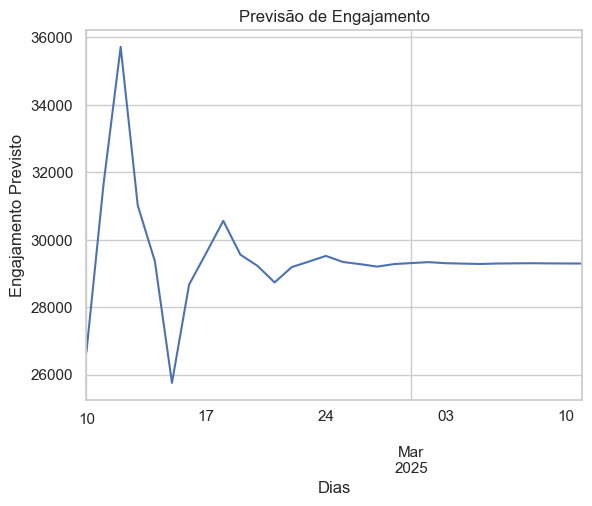

                        Data  predicted_mean
0  2025-02-10 00:00:00+00:00    26674.706379
1  2025-02-11 00:00:00+00:00    31652.077660
2  2025-02-12 00:00:00+00:00    35716.896219
3  2025-02-13 00:00:00+00:00    31014.264105
4  2025-02-14 00:00:00+00:00    29362.197205
5  2025-02-15 00:00:00+00:00    25755.551562
6  2025-02-16 00:00:00+00:00    28666.933092
7  2025-02-17 00:00:00+00:00    29603.580209
8  2025-02-18 00:00:00+00:00    30558.902610
9  2025-02-19 00:00:00+00:00    29555.100161
10 2025-02-20 00:00:00+00:00    29224.478779
11 2025-02-21 00:00:00+00:00    28732.460073
12 2025-02-22 00:00:00+00:00    29186.025754
13 2025-02-23 00:00:00+00:00    29350.179010
14 2025-02-24 00:00:00+00:00    29518.961746
15 2025-02-25 00:00:00+00:00    29338.767743
16 2025-02-26 00:00:00+00:00    29274.608543
17 2025-02-27 00:00:00+00:00    29201.769479
18 2025-02-28 00:00:00+00:00    29277.534863
19 2025-03-01 00:00:00+00:00    29306.593456
20 2025-03-02 00:00:00+00:00    29334.030812
21 2025-03

In [34]:
def train_arima(df, forecast_days):
    """
    Ajusta um modelo ARIMA para prever o engajamento e exibe os gráficos da série histórica e da previsão.
    """
    print("## Previsão de Engajamento com ARIMA")
    # Converte a coluna data_hora e ordena os dados
    df['data_hora'] = pd.to_datetime(df['data_hora'])
    df = df.sort_values('data_hora')
    
    # Agrega o engajamento diário (ajustável para outra granularidade, se necessário)
    df_daily = df.set_index('data_hora').resample('D')['total'].sum().fillna(0)
    
    print("### Série Temporal Diária de Engajamento")
    df_daily.plot(title="Engajamento Diário")
    plt.xlabel("Data")
    plt.ylabel("Engajamento")
    plt.show()
    
    # Define e treina o modelo ARIMA (a ordem pode ser ajustada conforme os dados)
    try:
        model = ARIMA(df_daily, order=(5, 1, 0))
        model_fit = model.fit()
    except Exception as e:
        print(f"Erro ao ajustar o modelo ARIMA: {e}")
        return
    
    # Realiza a previsão para os próximos 'forecast_days' dias
    forecast = model_fit.forecast(steps=forecast_days)
    
    print("### Previsão para os Próximos Dias")
    forecast.plot(title="Previsão de Engajamento")
    plt.xlabel("Dias")
    plt.ylabel("Engajamento Previsto")
    plt.show()
    
    # Exibe os resultados numéricos da previsão
    forecast_df = forecast.reset_index().rename(columns={'index': 'Data', 0: 'Engajamento Previsto'})
    print(forecast_df)

# Previsão de engajamento utilizando ARIMA
forecast_days = 30
train_arima(df, forecast_days)


In [35]:

"""
Analisa e sugere o melhor post com base em características de engajamento.
"""
df['num_caracteres'] = df['texto_original'].apply(len)
df['hora'] = pd.to_datetime(df['data_hora']).dt.hour
df['dia_semana'] = pd.to_datetime(df['data_hora']).dt.dayofweek

# Melhor horário de postagem
eng_por_hora = df.groupby('hora')['total'].mean().reset_index()
melhor_hora = eng_por_hora.loc[eng_por_hora['total'].idxmax(), 'hora']

# Melhor dia da semana
eng_por_dia = df.groupby('dia_semana')['total'].mean().reset_index()
melhor_dia_index = eng_por_dia.loc[eng_por_dia['total'].idxmax(), 'dia_semana']

# Mapeamento dos dias da semana
dias_da_semana = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'}
melhor_dia = dias_da_semana[melhor_dia_index]  # Obter o nome do dia da semana

# Melhor comprimento de texto
melhor_tamanho = df.groupby('num_caracteres')['total'].mean().idxmax()

# Exibir resultados
print(f"Melhor horário para postar: {melhor_hora}h")
print(f"Melhor dia da semana: {melhor_dia}")
print(f"Número ideal de caracteres: {melhor_tamanho}")


Melhor horário para postar: 4h
Melhor dia da semana: Sábado
Número ideal de caracteres: 100


SyntaxError: 'return' outside function (406737147.py, line 28)

## Análise de Características dos Posts

In [14]:
def analyze_post_features(df):
    """
    Analisa a relação entre características dos posts (como número de caracteres e hora de postagem) e o engajamento.
    """
    print("## Análise de Características dos Posts Relacionadas ao Engajamento")
    
    # 1. Quantidade de caracteres
    df['num_caracteres'] = df['texto_original'].apply(len)
    print("### Relação entre Quantidade de Caracteres e Engajamento")
    fig, ax = plt.subplots()
    sns.scatterplot(x='num_caracteres', y='total', data=df, ax=ax)
    ax.set_title("Engajamento vs. Número de Caracteres")
    plt.xlabel("Número de Caracteres")
    plt.ylabel("Engajamento")
    plt.show()
    
    # Exibe correlação entre número de caracteres e engajamento
    corr_chars = df[['num_caracteres', 'total']].corr().iloc[0, 1]
    print(f"Correlação entre número de caracteres e engajamento: {corr_chars:.2f}")
    
    # 2. Horário de Postagem
    df['hora'] = pd.to_datetime(df['data_hora']).dt.hour
    print("### Engajamento Médio por Hora de Postagem")
    eng_por_hora = df.groupby('hora')['total'].mean().reset_index()
    fig2, ax2 = plt.subplots()
    sns.lineplot(x='hora', y='total', data=eng_por_hora, marker='o', ax=ax2)
    ax2.set_title("Engajamento Médio por Hora")
    ax2.set_xlabel("Hora do Dia")
    ax2.set_ylabel("Engajamento Médio")
    plt.show()
    
    # 3. Tokens com Maior Engajamento
    print("### Tokens com Maior Acúmulo de Engajamento")
    top_tokens = get_top_tokens(df)
    print(top_tokens)

## Identificação de padrões

### Tokens com Mais Engajamento
                   Token  Engajamento
0               cruzeiro        87060
39                 vamos        28841
157                 azul        28789
183                 jogo        26830
531        labestianegra        25825
156                nação        22377
294                    h        19043
152               contra        18167
205  soucruzeirotradição        17563
48               técnico        17439
### Posts com Maior Engajamento

Cruzeiro 🦊 (@cruzeiro.com.br) - Engajamento: 5685
Texto Original: Fernando Diniz é o novo treinador do Cruzeiro!
Atual campeão da Copa Libertadores, da Recopa Sul-Americana e com passagem recente pela Seleção Brasileira, o técnico inicia sua trajetória no clube estrelado nesta terça-feira (24), quando já comandará os treinamentos da equipe.

Cruzeiro 🦊 (@cruzeiro.com.br) - Engajamento: 3980
Texto Original: O Cruzeiro comunica a saída de Fernando Seabra do comando técnico da equipe. Além do treinador, o auxiliar 

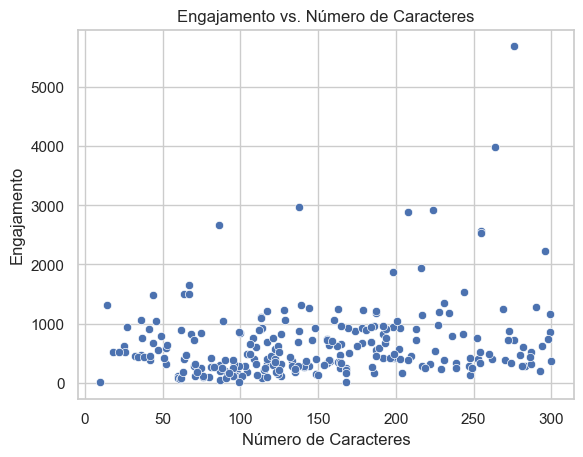

Correlação entre número de caracteres e engajamento: 0.24
### Engajamento Médio por Hora de Postagem


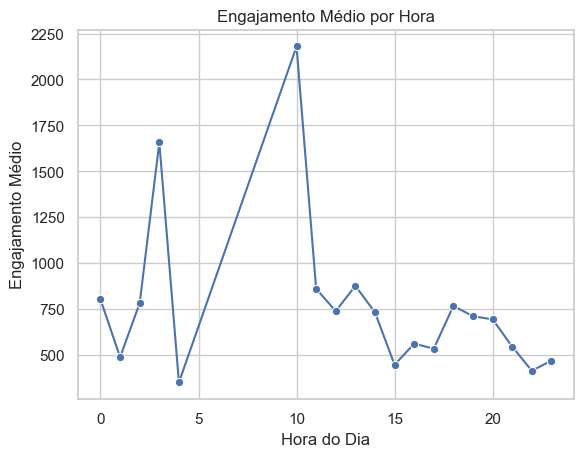

### Tokens com Maior Acúmulo de Engajamento
                   Token  Engajamento
0               cruzeiro        87060
39                 vamos        28841
157                 azul        28789
183                 jogo        26830
531        labestianegra        25825
156                nação        22377
294                    h        19043
152               contra        18167
205  soucruzeirotradição        17563
48               técnico        17439


In [15]:
# Exibe os tokens com maior engajamento
print("### Tokens com Mais Engajamento")
top_tokens = get_top_tokens(df)
print(top_tokens)

# Exibe os posts de maior engajamento
print("### Posts com Maior Engajamento")
top_posts = df.sort_values(by='total', ascending=False).head(5)
for _, row in top_posts.iterrows():
    print(f"\n{row['author_displayName']} (@{row['author_handle']}) - Engajamento: {row['total']}")
    print(f"Texto Original: {row['texto_original']}")
    # Se houver imagens, exibe a URL (se a estrutura do JSON na coluna 'record' estiver presente)
    record = row.get("record")
    if isinstance(record, str):
        try:
            import ast
            record = ast.literal_eval(record)
        except Exception:
            record = {}
    if isinstance(record, dict):
        embed = record.get("embed", {})
        if embed.get("$type") == "app.bsky.embed.images#view":
            images = embed.get("images", [])
            for image in images:
                image_url = image.get("fullsize", "")
                if image_url:
                    print(f"Imagem do Post: {image_url}")

# Análise das características dos posts
analyze_post_features(df)

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Listas de estados dos EUA e países do mundo
estados_eua = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

paises_mundo = ["United States", "Canada", "Mexico", "Brazil", "United Kingdom", "France", "Germany", "Italy", "Spain", "Russia", "China", "Japan", "India", "Australia", "South Africa", "Argentina", "Chile", "Colombia", "Peru", "Venezuela", "Saudi Arabia", "South Korea", "Turkey", "Egypt", "Nigeria", "Pakistan", "Bangladesh", "Indonesia", "Philippines", "Vietnam"]

# Carregar os arquivos CSV
def load_data():
    file1_path = "output/wsj.csv"
    file2_path = "output/nytimes.csv"
    df_wsj = pd.read_csv(file1_path)
    df_nyt = pd.read_csv(file2_path)
    return df_wsj, df_nyt

df_wsj, df_nyt = load_data()

# Adicionando título
print("Comparação de Engajamento: WSJ vs NYT")

# Definir métricas para comparação
metrics = ["comentarios", "likes", "compartilhamentos", "repostagens", "total"]

def analyze_sentiment(df, name):
    sentiments = []
    
    # Verifica se a coluna existe no DataFrame
    coluna_texto = "texto_original" if "texto_original" in df.columns else "texto_limpo"
    
    for text in df[coluna_texto].dropna():  # Remove valores nulos antes de iterar
        if any(state in text for state in estados_eua) or any(country in text for country in paises_mundo):
            sentiment_score = analyzer.polarity_scores(text)["compound"]
            sentiments.append(sentiment_score)
    
    return sentiments

wsj_sentiments = analyze_sentiment(df_wsj, "WSJ")
nyt_sentiments = analyze_sentiment(df_nyt, "NYT")

# Criar dataframe de comparação
df_sentiment_comparacao = pd.DataFrame({
    "Fonte": ["WSJ"] * len(wsj_sentiments) + ["NYT"] * len(nyt_sentiments),
    "Sentimento": wsj_sentiments + nyt_sentiments
})



# Análise de sentimentos para posts que mencionam estados ou países
analyzer = SentimentIntensityAnalyzer()



Comparação de Engajamento: WSJ vs NYT


In [22]:
from collections import defaultdict

# Função para extrair e calcular os sentimentos por país
def sentiment_by_country(df, name):
    sentiment_dict = defaultdict(list)  # Usaremos um dicionário para armazenar os sentimentos por país

    # Iterar sobre as postagens e calcular o sentimento
    coluna_texto = "texto_original" if "texto_original" in df.columns else "texto_limpo"
    
    for text in df[coluna_texto].dropna():
        # Verificar os países mencionados no texto
        countries_mentioned = [country for country in paises_mundo if country in text]
        if countries_mentioned:
            sentiment_score = analyzer.polarity_scores(text)["compound"]
            for country in countries_mentioned:
                sentiment_dict[country].append(sentiment_score)

    # Calcular o sentimento médio por país
    country_sentiments = {country: sum(sentiments) / len(sentiments) for country, sentiments in sentiment_dict.items()}
    return country_sentiments

# Obter o sentimento por país para WSJ e NYT
wsj_country_sentiments = sentiment_by_country(df_wsj, "WSJ")
nyt_country_sentiments = sentiment_by_country(df_nyt, "NYT")

# Identificar os países com sentimento mais positivo e negativo
wsj_most_positive = max(wsj_country_sentiments, key=wsj_country_sentiments.get)
wsj_most_negative = min(wsj_country_sentiments, key=wsj_country_sentiments.get)

nyt_most_positive = max(nyt_country_sentiments, key=nyt_country_sentiments.get)
nyt_most_negative = min(nyt_country_sentiments, key=nyt_country_sentiments.get)

# Exibir os resultados
print("### Países com o Sentimento Mais Positivo e Negativo por Dataset")

# Resultados do WSJ
print(f"WSJ - País com Sentimento Mais Positivo: {wsj_most_positive} ({wsj_country_sentiments[wsj_most_positive]:.2f})")
print(f"WSJ - País com Sentimento Mais Negativo: {wsj_most_negative} ({wsj_country_sentiments[wsj_most_negative]:.2f})")

# Resultados do NYT
print(f"NYT - País com Sentimento Mais Positivo: {nyt_most_positive} ({nyt_country_sentiments[nyt_most_positive]:.2f})")
print(f"NYT - País com Sentimento Mais Negativo: {nyt_most_negative} ({nyt_country_sentiments[nyt_most_negative]:.2f})")


### Países com o Sentimento Mais Positivo e Negativo por Dataset
WSJ - País com Sentimento Mais Positivo: Italy (0.53)
WSJ - País com Sentimento Mais Negativo: Colombia (-0.80)
NYT - País com Sentimento Mais Positivo: United States (0.14)
NYT - País com Sentimento Mais Negativo: Philippines (-0.52)


In [23]:
# Função para extrair e calcular os sentimentos por estado
def sentiment_by_state(df, name):
    sentiment_dict = defaultdict(list)  # Dicionário para armazenar os sentimentos por estado

    # Iterar sobre as postagens e calcular o sentimento
    coluna_texto = "texto_original" if "texto_original" in df.columns else "texto_limpo"
    
    for text in df[coluna_texto].dropna():
        # Verificar os estados mencionados no texto
        states_mentioned = [state for state in estados_eua if state in text]
        if states_mentioned:
            sentiment_score = analyzer.polarity_scores(text)["compound"]
            for state in states_mentioned:
                sentiment_dict[state].append(sentiment_score)

    # Calcular o sentimento médio por estado
    state_sentiments = {state: sum(sentiments) / len(sentiments) for state, sentiments in sentiment_dict.items()}
    return state_sentiments

# Obter o sentimento por estado para WSJ e NYT
wsj_state_sentiments = sentiment_by_state(df_wsj, "WSJ")
nyt_state_sentiments = sentiment_by_state(df_nyt, "NYT")

# Identificar os estados com sentimento mais positivo e negativo
wsj_most_positive_state = max(wsj_state_sentiments, key=wsj_state_sentiments.get)
wsj_most_negative_state = min(wsj_state_sentiments, key=wsj_state_sentiments.get)

nyt_most_positive_state = max(nyt_state_sentiments, key=nyt_state_sentiments.get)
nyt_most_negative_state = min(nyt_state_sentiments, key=nyt_state_sentiments.get)

# Exibir os resultados
print("### Estados com o Sentimento Mais Positivo e Negativo por Dataset")

# Resultados do WSJ
print(f"WSJ - Estado com Sentimento Mais Positivo: {wsj_most_positive_state} ({wsj_state_sentiments[wsj_most_positive_state]:.2f})")
print(f"WSJ - Estado com Sentimento Mais Negativo: {wsj_most_negative_state} ({wsj_state_sentiments[wsj_most_negative_state]:.2f})")

# Resultados do NYT
print(f"NYT - Estado com Sentimento Mais Positivo: {nyt_most_positive_state} ({nyt_state_sentiments[nyt_most_positive_state]:.2f})")
print(f"NYT - Estado com Sentimento Mais Negativo: {nyt_most_negative_state} ({nyt_state_sentiments[nyt_most_negative_state]:.2f})")


### Estados com o Sentimento Mais Positivo e Negativo por Dataset
WSJ - Estado com Sentimento Mais Positivo: Missouri (0.36)
WSJ - Estado com Sentimento Mais Negativo: Tennessee (-0.67)
NYT - Estado com Sentimento Mais Positivo: New Hampshire (0.26)
NYT - Estado com Sentimento Mais Negativo: Mississippi (-0.59)
